# Imports

In [1]:
import numpy as np

# Algorithm: Gradient method with Armijo Rule

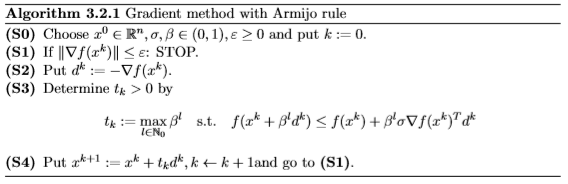

In [3]:
from IPython.display import Image
Image("gradient_method.PNG")

In [12]:
def gradient_method_rosenbrock(x_0, beta, sigma, epsilon, f, gradient):
    x = x_0
    iterations = 0
    while np.linalg.norm(gradient(x)) >= epsilon:
        descent_direction = -1 * gradient(x)

        step_size = armijo_rule(beta, sigma, x, descent_direction, gradient, f)

        # update step
        x = x + step_size * descent_direction
        iterations += 1

    print("Number of iterations: {}".format(iterations))
    return iterations

# Step Size: Armijo Rule
- We want to combine the search direction $d^k = - \nabla f(x^k)$ with step-size $t_k$
- The Armijo rule is supposed to ensure a sufficient decrease of the objective function

In [9]:
def armijo_rule(beta, sigma, x_p, d, gradient, f):
    i = 0
    inequality_satisfied = True
    while inequality_satisfied:
        if f(x_p + np.power(beta, i) * d) <= f(x_p) + np.power(beta, i) * sigma * gradient(
                x_p).dot(d):
            break

        i += 1

    return np.power(beta, i)

# Rosenbrock Function
- Introduced by Howard H. Rosenbrock in 1960, used as a performance test problem for optimization problems.
- The Rosenbrock function $r: \mathbb{R}^2 \rightarrow \mathbb{R}$ is given by:
$$r(x) = 100 (x_2 - x_1^2)^2+ (1 - x_1)^2$$

In [10]:
def rosenbrock(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

def rosenbrock_gradient(x_p):
    new_x = np.array([
        2 * (-200 * x_p[0] * x_p[1] + 200 * np.power(x_p[0], 3) - 1 + x_p[0]),
        200 * (x_p[1] - x_p[0] ** 2)
    ])

    return new_x

# Example
- The parameters will be the following:
$$\beta := 0.5, \sigma := 10^{-4}, \varepsilon := 10^{-4}$$
- Start point will be the following:
$$x^0 := (-1.2, 1)$$

In [11]:
gradient_method_rosenbrock(x_0=[-1.2, 1],
                           beta=0.5,
                           sigma=0.0001,
                           epsilon=0.0001,
                           f=rosenbrock,
                           gradient=rosenbrock_gradient)

Number of iterations: 8058


8058

# References